In [0]:
from sklearn import linear_model, model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [0]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df2 = pd.read_csv('/content/drive/My Drive/Data Science FEM/Data Science Group/Clases William/Ejercicio uno machine learning/bank-full.csv', delimiter=';')

In [0]:
#Para Leerlo Local
##from google.colab import files
##uploaded = files.upload()
##import io
##df2 = pd.read_csv(io.BytesIO(uploaded['bank-full.csv']), delimiter=";")

In [0]:
 # muestra del dataset
  df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Pregunta de negocio
¿cuáles son los clientes con mayor probabilidad de suscribirse al fondo del banco? ¿Cuáles son las variables o los grupos que aumentan esta probabilidad? Estas preguntas implican construir un modelo predictivo.

**¿Qué tipo de modelo predictivo es útil en este caso considerando este
problema y sus variables? ¿Es más pertinente un modelo supervisado o no supervisado?
¿Un modelo de clasificación o un modelo de regresión?**
El modelo predictivo más adecuado es la regresión logística porque la variable objetivo es binaria (yes, no).
Es más pertinente es un modelo supervisado, pues se quiere hacer una predicción y además se tienen los datos etiquetados, que permiten trabajar con modelos supervisados y tienen mejor rendimiento que uno no supervisado.

#Paso 3. Análisis de los datos (Data Understanding)

In [0]:
#2.¿Cuál es la proporción de las clases para la variable objetivo (target)?
df2.groupby('y').size()/df2.shape[0]

y
no     0.883015
yes    0.116985
dtype: float64

In [0]:
#3.¿Cuántas variables numéricas hay?
#4.¿Cuál es la media y la desviación estándar de las variables numéricas?
#5.¿Cuáles son los valores máximos y mínimos de las variables numéricas?
df2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**3.¿Cuántas variables numéricas hay?**
R/ Hay 6 variables numéricas, ya que DAY es una variable categórica



**4. ¿Cuál es la media y la desviación estándar de las variables numéricas?**

In [0]:
df2.describe().loc[['mean','std']]

,age,balance,day,duration,campaign,pdays,previous
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441



**5. ¿Cuáles son los valores máximos y mínimos de las variables numéricas?**

In [0]:
df2.describe().loc[['max','min']]

,age,balance,day,duration,campaign,pdays,previous
max,95.0,102127.0,31.0,4918.0,63.0,871.0,275.0
min,18.0,-8019.0,1.0,0.0,1.0,-1.0,0.0


**6. ¿Cuántas variables categóricas hay?**


In [0]:
df2.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [0]:
#¿Cuántas variables categoricas hay? R// 11
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB




**7 ¿Cuántos valores diferentes tiene cada variable categórica?**





In [0]:
df2['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [0]:
df2.groupby('marital',as_index=False).size()

marital
divorced     5207
married     27214
single      12790
dtype: int64

In [0]:
df2.groupby('education',as_index=False).size()

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
dtype: int64

In [0]:
df2.groupby('default',as_index=False).size()

default
no     44396
yes      815
dtype: int64

In [0]:
df2.groupby('housing',as_index=False).size()

housing
no     20081
yes    25130
dtype: int64

In [0]:
df2.groupby('loan',as_index=False).size()

loan
no     37967
yes     7244
dtype: int64

In [0]:
df2.groupby('contact',as_index=False).size()

contact
cellular     29285
telephone     2906
unknown      13020
dtype: int64

In [0]:
df2.groupby('day',as_index=False).size()

day
1      322
2     1293
3     1079
4     1445
5     1910
6     1932
7     1817
8     1842
9     1561
10     524
11    1479
12    1603
13    1585
14    1848
15    1703
16    1415
17    1939
18    2308
19    1757
20    2752
21    2026
22     905
23     939
24     447
25     840
26    1035
27    1121
28    1830
29    1745
30    1566
31     643
dtype: int64

In [0]:
df2.groupby('month',as_index=False).size()

month
apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3970
oct      738
sep      579
dtype: int64

In [0]:
df2.groupby('poutcome',as_index=False).size()

poutcome
failure     4901
other       1840
success     1511
unknown    36959
dtype: int64

Teniendo en cuenta todo el conjunto de variables. ¿Cuáles tienen la
mayor correlación?

In [0]:
df3 = df2.copy()
df3['y'] = (df3['y'] == 'yes').astype(int)

df3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


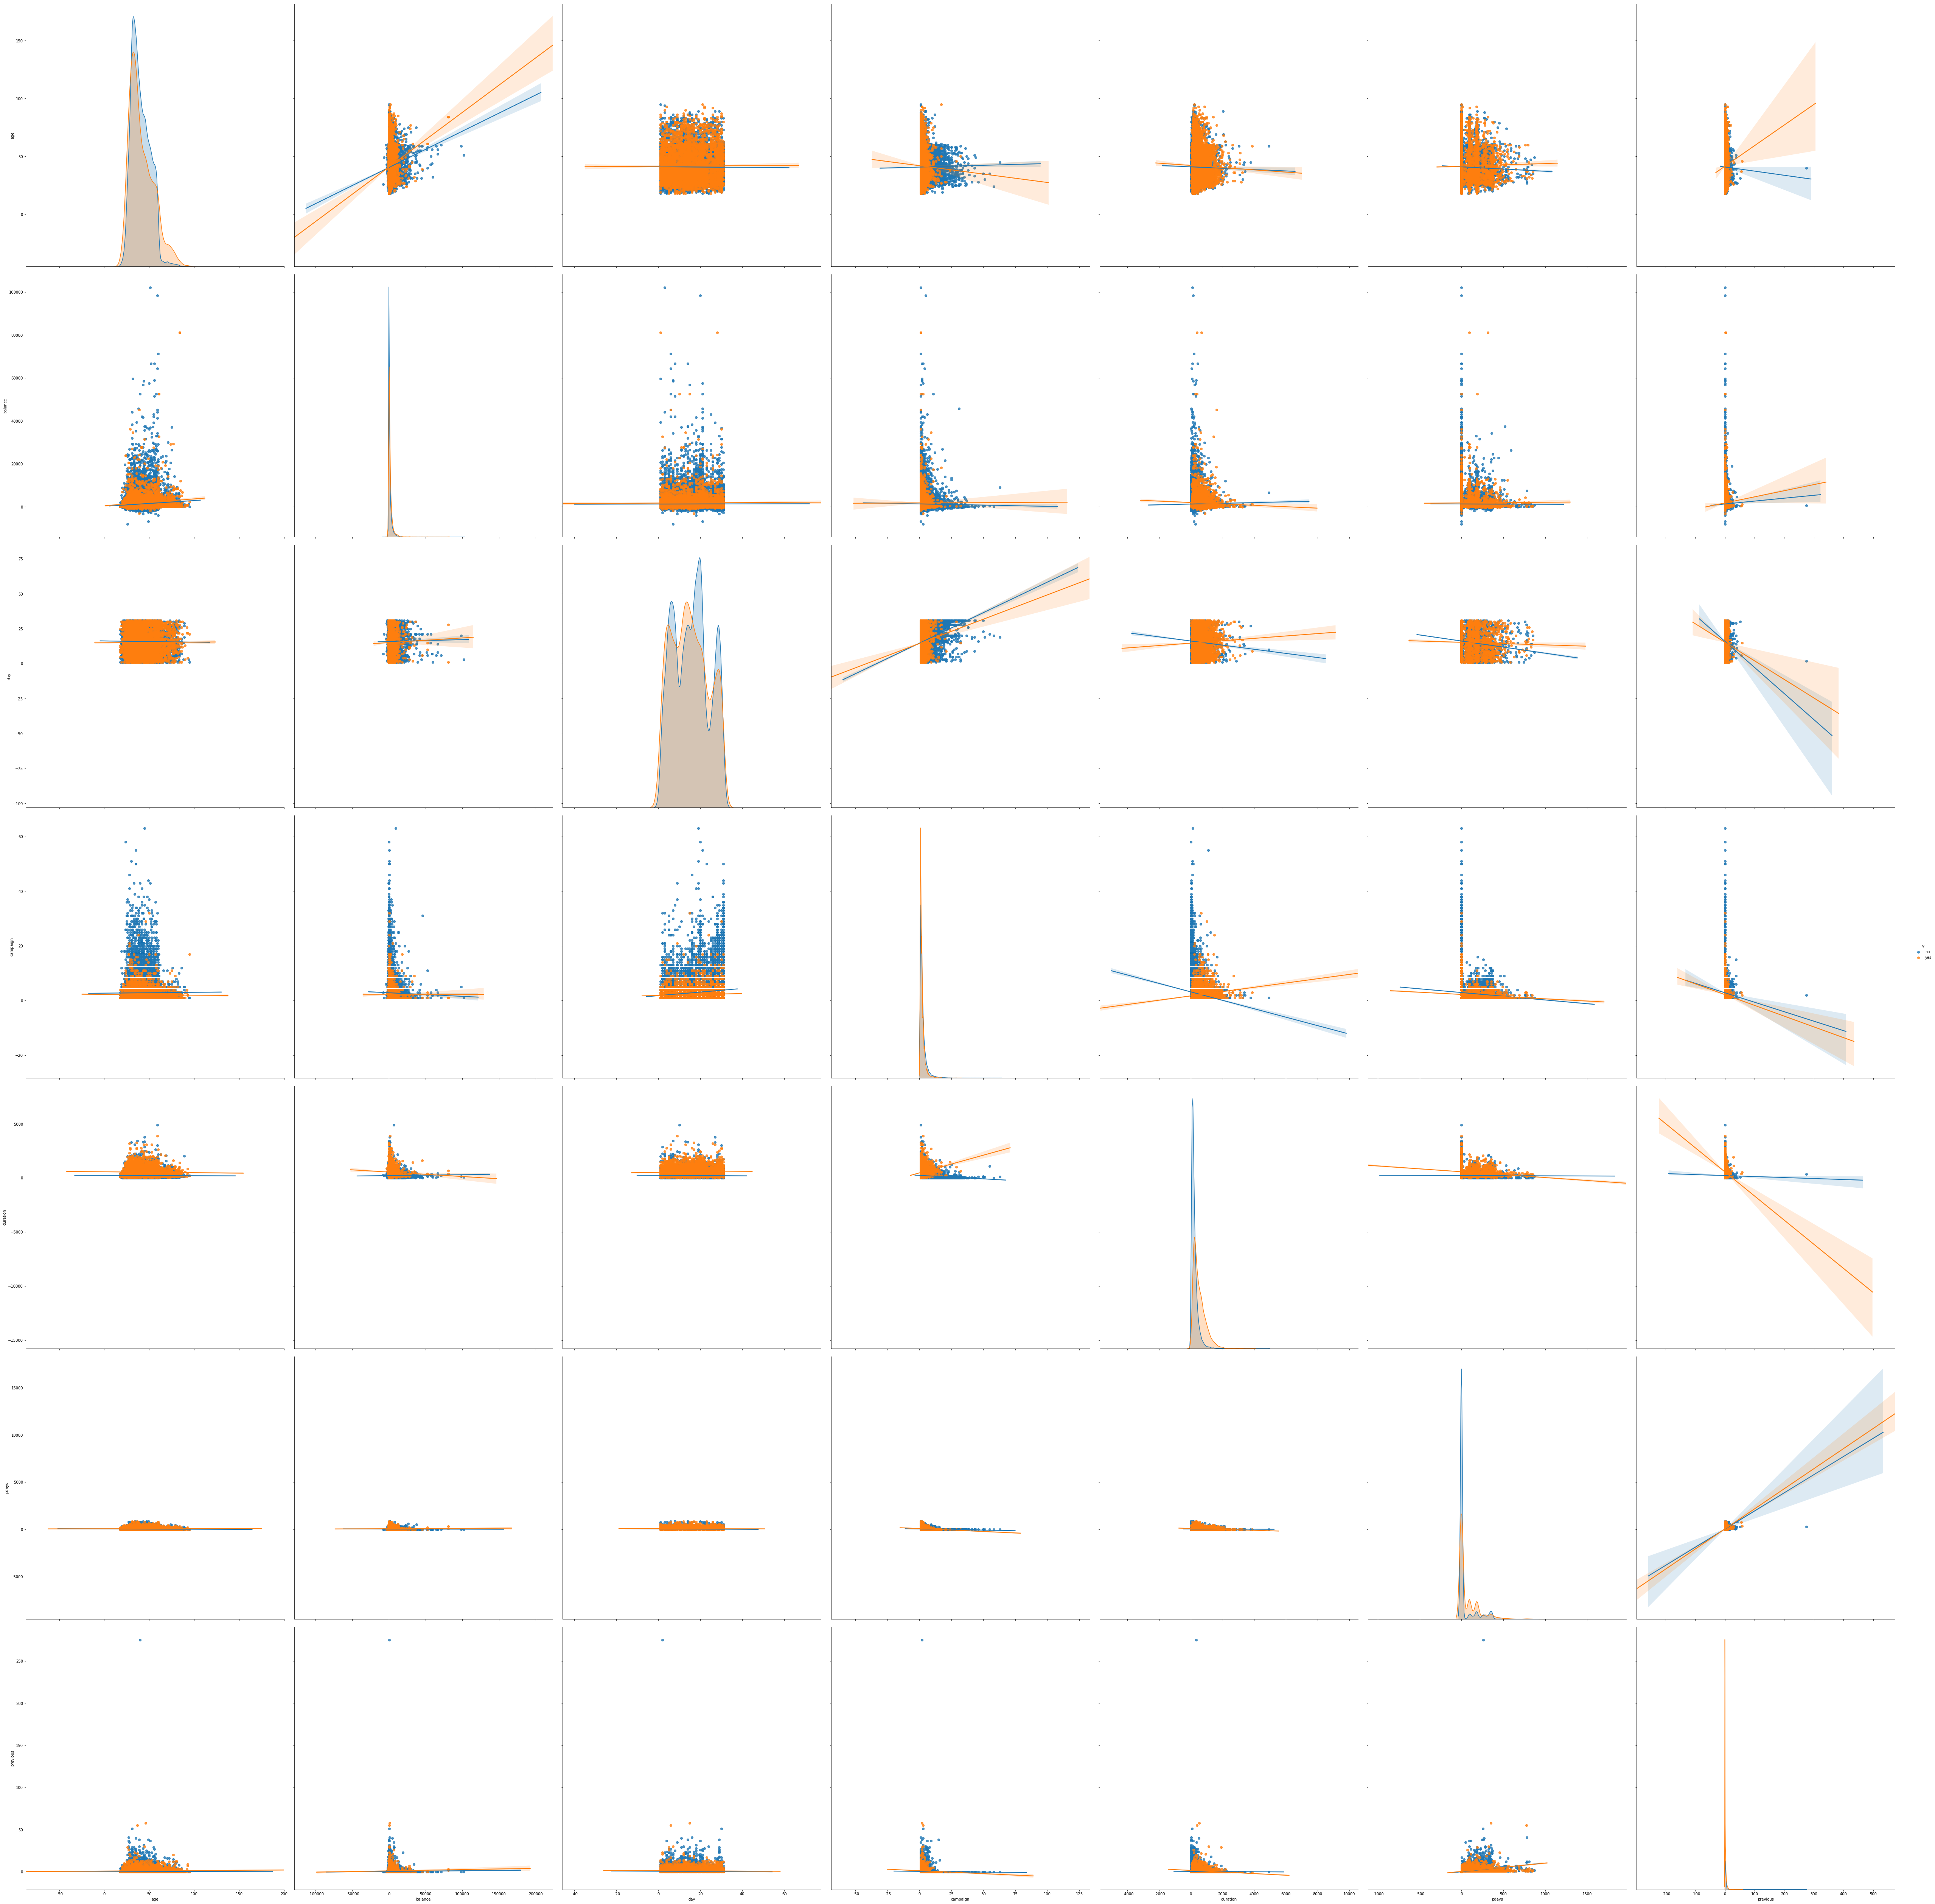

In [0]:
sns.pairplot(df2.dropna(), hue='y',size=10,vars=["age", "balance","day","campaign","duration", "pdays","previous"],kind='reg')

## Paso 5. Modelo de predicción y evaluación del modelo (Predictive modelling)


In [0]:

cat_var = {'housing': {'yes':1,'no':0},         
          'loan' : {'yes':1,'no':0},
           'default':{'yes':1, 'no':0}
         }

df3.replace(cat_var, inplace=True)

In [0]:
df4 = df3.loc[:, ['job',	'marital',	'education',	'default',	'balance',	'housing',	'loan',	'contact',		'duration',	'campaign',	'pdays',	'previous',	'poutcome',	'y'
]]

In [0]:
df4

,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,management,married,tertiary,0,2143,1,0,unknown,261,1,-1,0,unknown,0
1,technician,single,secondary,0,29,1,0,unknown,151,1,-1,0,unknown,0
2,entrepreneur,married,secondary,0,2,1,1,unknown,76,1,-1,0,unknown,0
3,blue-collar,married,unknown,0,1506,1,0,unknown,92,1,-1,0,unknown,0
4,unknown,single,unknown,0,1,0,0,unknown,198,1,-1,0,unknown,0
5,management,married,tertiary,0,231,1,0,unknown,139,1,-1,0,unknown,0
6,management,single,tertiary,0,447,1,1,unknown,217,1,-1,0,unknown,0
7,entrepreneur,divorced,tertiary,1,2,1,0,unknown,380,1,-1,0,unknown,0
8,retired,married,primary,0,121,1,0,unknown,50,1,-1,0,unknown,0
9,technician,single,secondary,0,593,1,0,unknown,55,1,-1,0,unknown,0


In [0]:
var_cat = ['job','marital','education']
df5 = pd.get_dummies(df4,prefix=cols_dummies, drop_first=True)

In [0]:
df5.head()

,default,balance,housing,loan,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,0,2143,1,0,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
1,0,29,1,0,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1
2,0,2,1,1,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3,0,1506,1,0,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1
4,0,1,0,0,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1


In [0]:
df5.shape

(45211, 30)

In [0]:
X = np.array(df5.drop(['y'],1))
y = np.array(df5['y'])
X.shape

(45211, 29)

In [0]:
model = linear_model.LogisticRegression()
model.fit(X,y)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = model.predict(X)
print(predictions)

[0 0 0 ... 1 0 0]


In [0]:
model.score(X,y)

0.900311871004844

In [0]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [0]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Logistic Regression: 0.898668 (0.006345)


In [0]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.9056728961627778


In [0]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [0]:
model.coef_

array([[-8.39495375e-02,  1.48156474e-05, -7.97565481e-01,
        -6.14342211e-01,  4.02468128e-03, -1.30727614e-01,
        -2.17617673e-03, -7.35340679e-03, -4.25212449e-01,
        -2.17854036e-01, -2.73195377e-01, -8.34878911e-02,
         2.47817516e-01, -1.66340864e-01, -2.40684317e-01,
         3.03821439e-01, -2.01325118e-01, -9.56534106e-02,
        -4.44171157e-02, -3.41921452e-01, -5.36114431e-03,
        -9.73663129e-02,  6.15754548e-02, -6.05768283e-02,
        -5.99410365e-02, -1.13045279e+00, -1.94183975e-01,
         1.64960354e+00, -1.21438046e+00]])

In [0]:
X

array([[   0, 2143,    1, ...,    0,    0,    1],
       [   0,   29,    1, ...,    0,    0,    1],
       [   0,    2,    1, ...,    0,    0,    1],
       ...,
       [   0, 5715,    0, ...,    0,    1,    0],
       [   0,  668,    0, ...,    0,    0,    1],
       [   0, 2971,    0, ...,    1,    0,    0]])

In [0]:
np.argsort(np.abs(model.coef_))

array([[ 1,  6,  4, 20,  7, 18, 24, 23, 22, 11,  0, 17, 21,  5, 13, 26,
        16,  9, 14, 12, 10, 15, 19,  8,  3,  2, 25, 28, 27]])

In [0]:
model.coef_[0][27]

1.6496035401647753

In [0]:
np.max(np.abs(model.coef_))

1.6496035401647753

In [0]:
np.sum(X[:, 27]==y)/len(y)

0.8928579328039636